Python Packages

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<b>PROBLEM</b>

* The problem in investing on a company is that sometimes the company doesn’t deliver what it is promised, ending up in wasting investor’s capital.

<b>GOAL</b>

* To create a model that can be used both by investors and individuals alike who are interested in either backing up a single product or investing a huge sum of capital on companies listed in Kickstarter by predicting the chances of success based on Kickstarter data.


In [2]:
df = pd.read_csv('2state.csv',index_col=0)

In [3]:
df

name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000014025                               Monarch Espresso Bar   
...                                                       ...   
999975836               Homemade fresh dog food, Cleveland OH   
999977640                                           The Tribe   
999986353   Walls of Remedy- New lesbian Romantic Comedy f...   
999987933                            BioDefense Education Kit   
999988282                   Nou Renmen Ayiti!  We Love Haiti!   

                   category main_category    deadline    launched       state  \
ID                                                                              
1000002330           Poetry    Publishing  2015-10-09  2015-08-11      failed   
1000003930   Narrative Film  Film & Video  2017-11-01  2017-09-02      failed   
1000004038   Narrative Film  Film & Video  2013-02-26  2013-01-12      failed   
1000007540            Music         Music  2012-04-16  2012-03-17      failed   
1000014025      Restaurants          Food  2016-04-01  2016-02-26  successful   
...                     ...           ...         ...         ...         ...   
999975836       Small Batch          Food  2017-04-19  2017-03-20      failed   
999977640    Narrative Film  Film & Video  2011-07-19  2011-06-22      failed   
999986353    Narrative Film  Film & Video  2010-08-16  2010-07-01      failed   
999987933        Technology    Technology  2016-02-13  2016-01-13      failed   
999988282   Performance Art           Art  2011-08-16  2011-07-19      failed   

            backers country  usd_pledged_real  usd_goal_real  time_avail  
ID                                                                        
1000002330        0      GB               0.0        1533.95          58  
1000003930       15      US            2421.0       30000.00          59  
1000004038        3      US             220.0       45000.00          44  
1000007540        1      US               1.0        5000.00          29  
1000014025      224      US           52375.0       50000.00          34  
...             ...     ...               ...            ...         ...  
999975836         4      US             154.0        6500.00          29  
999977640         5      US             155.0        1500.00          26  
999986353         1      US              20.0       15000.00          45  
999987933         6      US             200.0       15000.00          30  
999988282        17      US             524.0        2000.00          27  

[337079 rows x 11 columns]

Null Re-checking


null no longer exist due to the cleaning in the previous notebook

In [4]:
df.isnull().sum()

name                0
category            0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
time_avail          0
dtype: int64

Describing Data:

No.1 Category

Descriptive:
category feature is actually a sub category from 'main_category'
There are 159 sub_categories in Kickstarter (or in this dataset at least)

Product Design is the most campaign offered in Kickstarter, followed by Documentary, Music, and Tabletop Games..
Chiptunes, Literary Spaces, and Taxidermy is the least campaign offered in Kickstarter

In [5]:
df.category.value_counts()

Product Design     18869
Music              14919
Documentary        14540
Tabletop Games     11778
Shorts             11402
                   ...  
Residencies           68
Letterpress           47
Chiptune              33
Literary Spaces       19
Taxidermy             12
Name: category, Length: 159, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158]),
 <a list of 159 Text major ticklabel objects>)

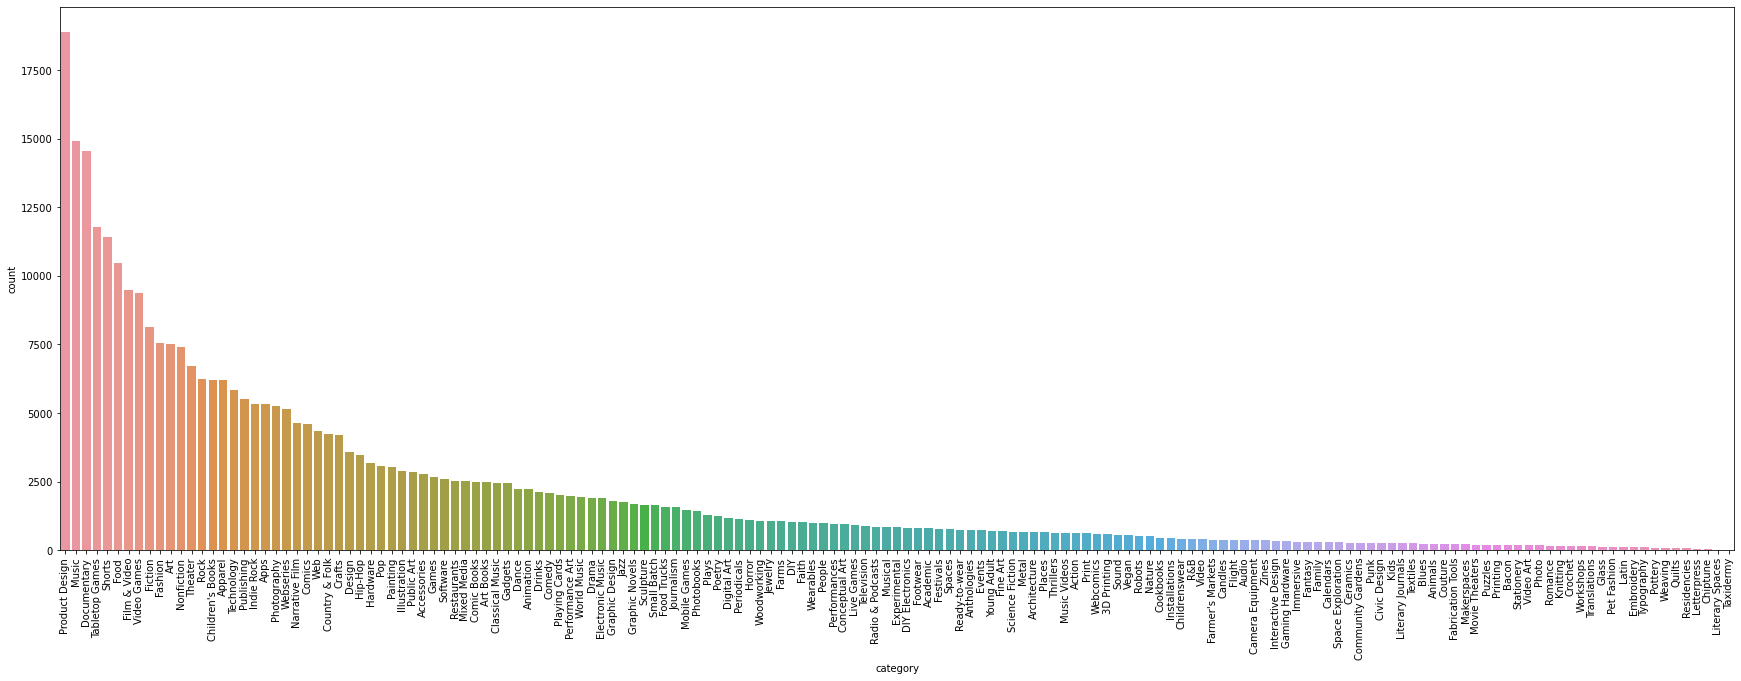

In [6]:
plt.figure(figsize=(30,10))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.xticks(rotation=90)

Describing Data:

No.2 main_category

Descriptive: despite the high product design numbers in the subcategory, the most campaign started in Kickstarter by category is Film and Video, followed by Music and Publishing. while design falls on sixth position and dance being last 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

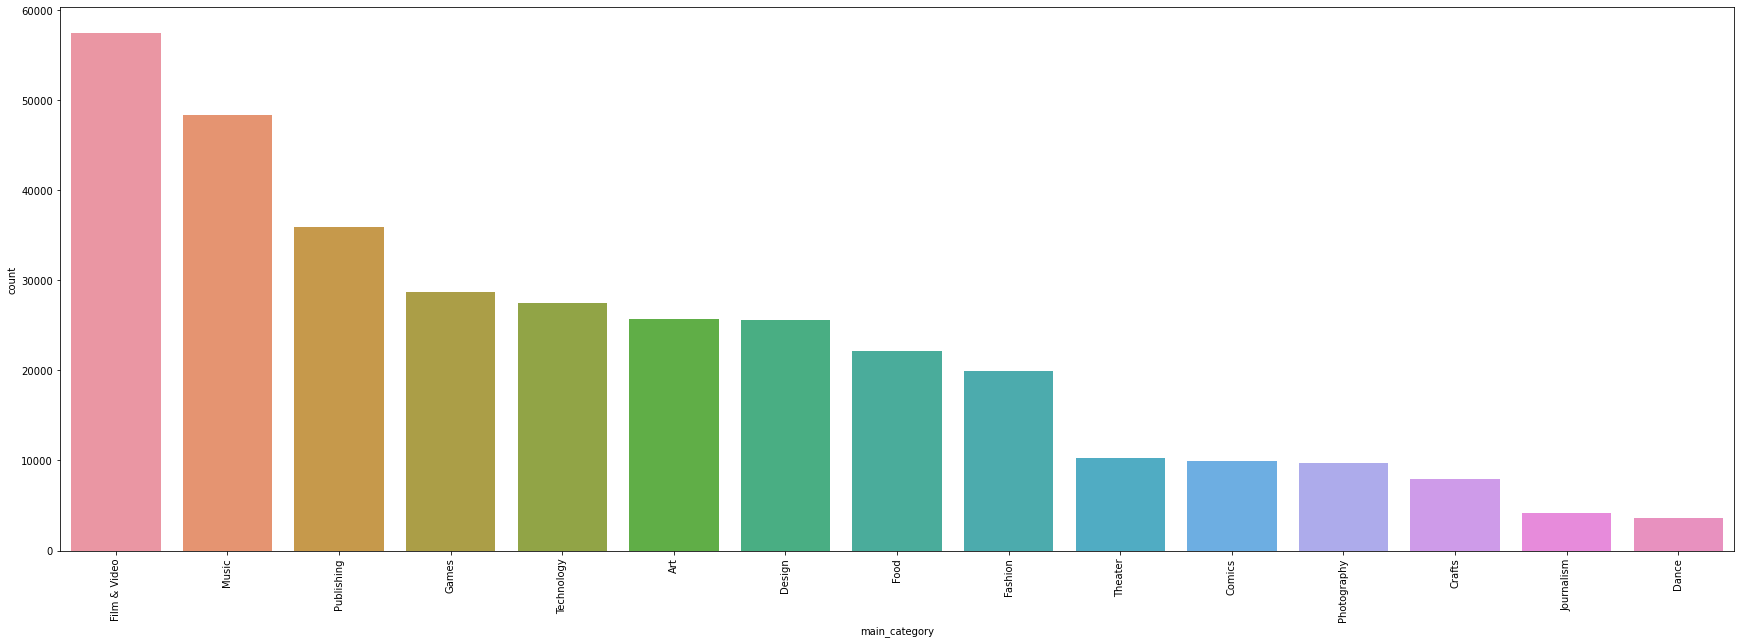

In [7]:
plt.figure(figsize=(30,10))
sns.countplot(x='main_category', data=df, order=df['main_category'].value_counts().index)
plt.xticks(rotation=90)

Describing Data:

No.3 pledged
pledged is basically the number of money being pledged by the backers who supports the campaign.

from the data, the smallest number of pledges are USD 0, or no one backed / supported the campaign, while the highest pledges is USD 20.338.986<br>
I won't be excluding outliers because there are cases that the company set the goal very high due to high production cost or due to high demand<br>
this kind of project will be included in the computations

but for the sake of checking the distributions, outliers will be removed on this section but not during modelling



In [8]:
df['usd_pledged_real'].value_counts().sort_index()

0.00           39952
0.45               1
0.47               1
0.48               2
0.49               4
               ...  
10266845.74        1
12393139.69        1
12779843.49        1
13285226.36        1
20338986.27        1
Name: usd_pledged_real, Length: 99690, dtype: int64

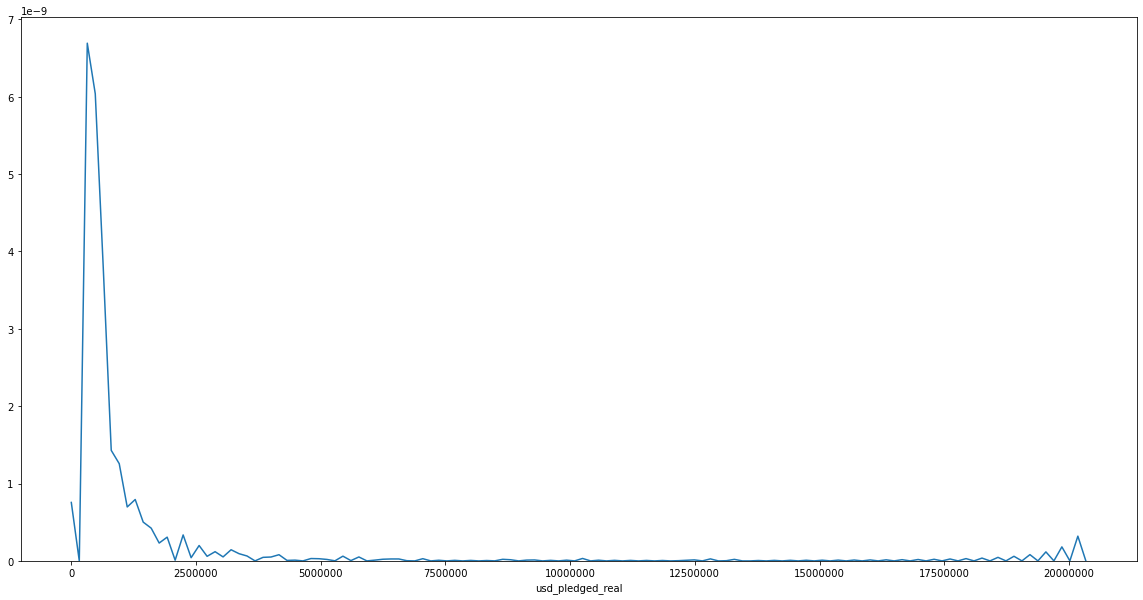

In [9]:
plt.figure(figsize=(20,10))
sns.distplot(df['usd_pledged_real'], hist=False)
plt.MaxNLocator()
plt.ticklabel_format(style='plain',axis='x')

outliers removal

In [10]:
dfx = df.copy()
Q1 = dfx.quantile(0.25)
Q3 = dfx.quantile(0.75)
IQR = Q3-Q1
IQR

backers                60.00
usd_pledged_real     4529.13
usd_goal_real       13000.00
time_avail              6.00
dtype: float64

In [11]:
dfx = dfx[~((dfx < (Q1 - 1.5 * IQR))|(dfx > (Q3 + 1.5 * IQR))).any(axis=1)]

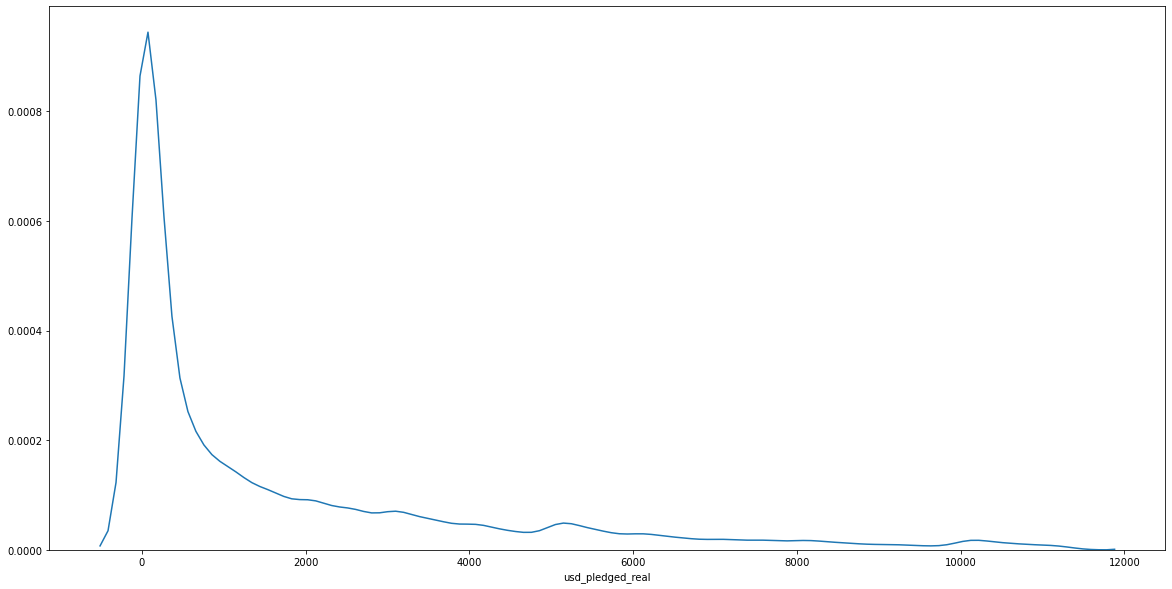

In [12]:
plt.figure(figsize=(20,10))
sns.distplot(dfx['usd_pledged_real'], hist=False)
plt.MaxNLocator()
plt.ticklabel_format(style='plain',axis='x')

Describing Data:

No.4 countries
from all of the campaigner's countries of origin, US has the largest number, followed by Great Britain, and Canada..
while Japan is and Luxemburg is the least.

to make everything easier to understand, I will re-categorize into regions instead of countries

the 'N,0"' country are unknown and will be listed as 'Others'


North America has the most number of campaigners, followed by Europe, and Asia and Oceania has the least number of campaigners



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

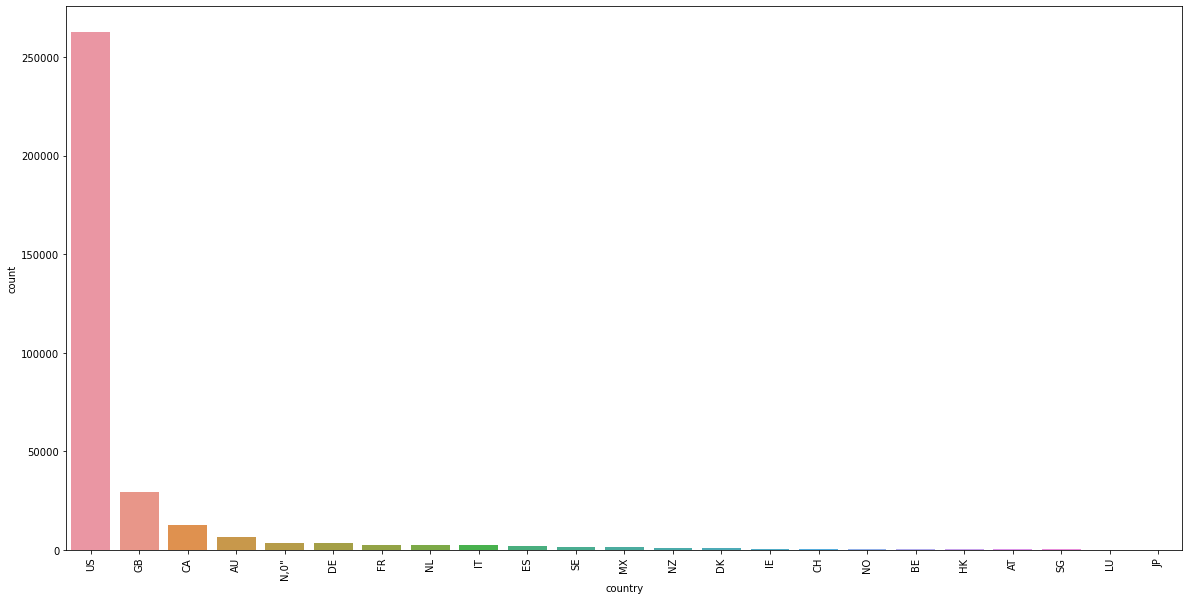

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index)
plt.xticks(rotation=90)

In [14]:
df['country'] = df['country'].replace(['N,0"'],'Other')
df['country'] = df['country'].replace(['US','CA','MX'],'North America')
df['country'] = df['country'].replace(['GB','AU','DE','FR','NL','IT','ES','IE','CH','NO','BE','AT','LU','SE','DK'],'Europe')
df['country'] = df['country'].replace(['NZ','HK','SG','JP'],'Asia and Oceania')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

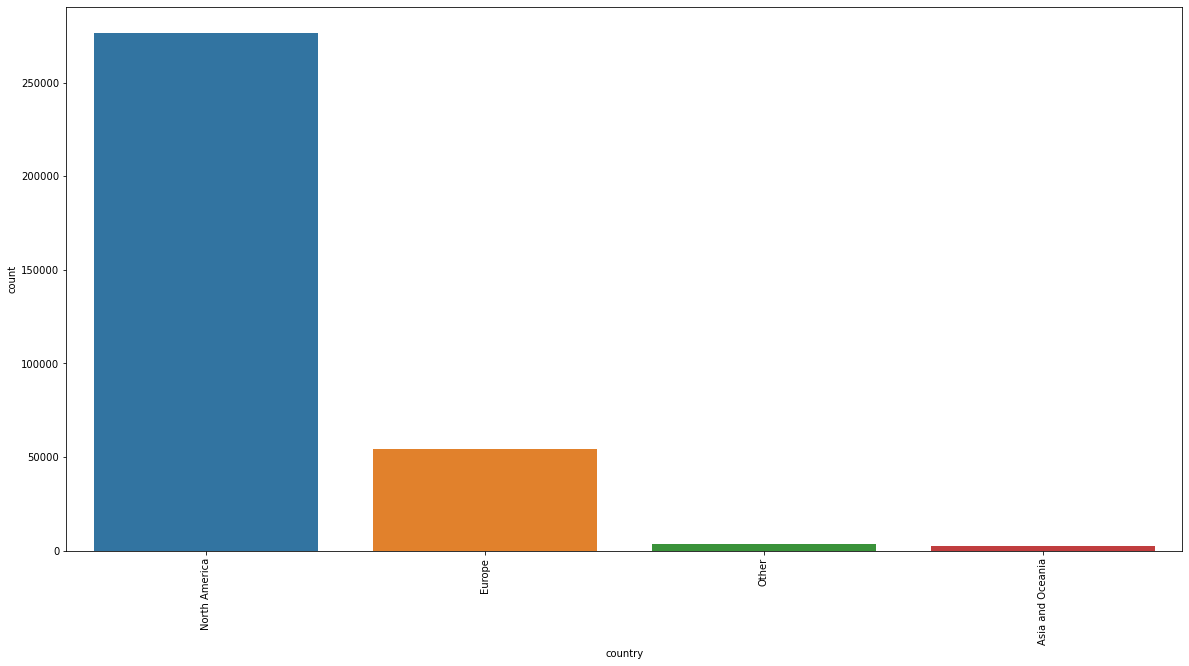

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=df, order=df['country'].value_counts().index)
plt.xticks(rotation=90)

Describing Data:

No.5 goals

goals are basically a set of funding target set by the campaigners so they could execute their plan
the number of the goals are vary.. ranging from USD 0.010 to USD 166.361.390 and the distributions are quite scattered.


In [16]:
df['usd_goal_real'].value_counts().sort_index()

1.000000e-02    1
1.500000e-01    1
4.900000e-01    1
5.000000e-01    1
5.500000e-01    1
               ..
1.040572e+08    1
1.073699e+08    1
1.101698e+08    1
1.513959e+08    1
1.663614e+08    1
Name: usd_goal_real, Length: 45237, dtype: int64

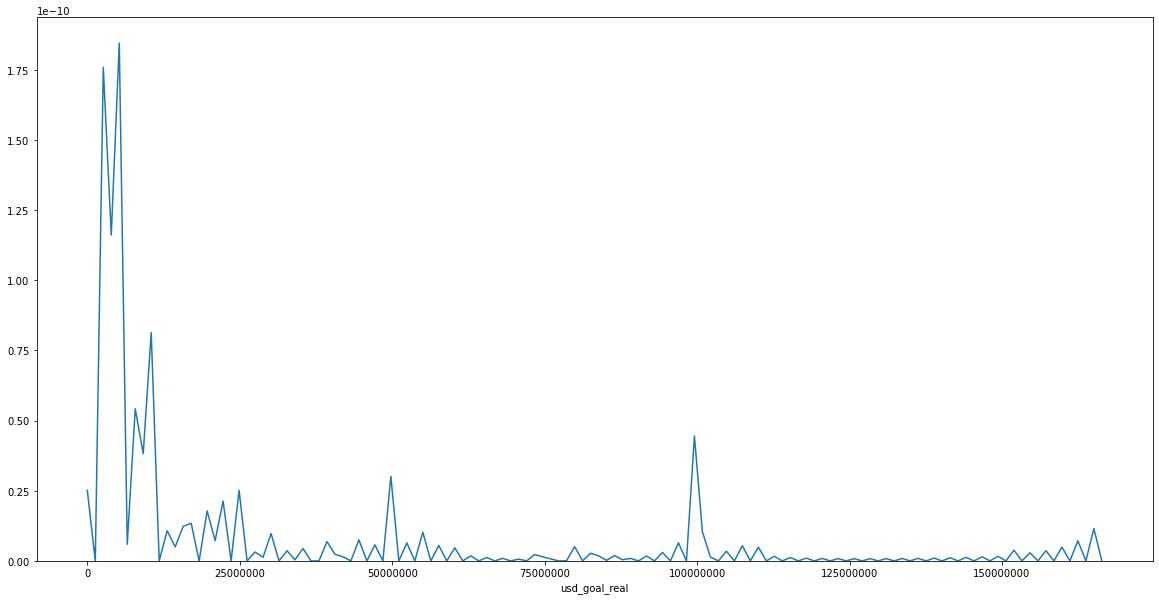

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(df['usd_goal_real'], hist=False)
plt.MaxNLocator()
plt.ticklabel_format(style='plain',axis='x')

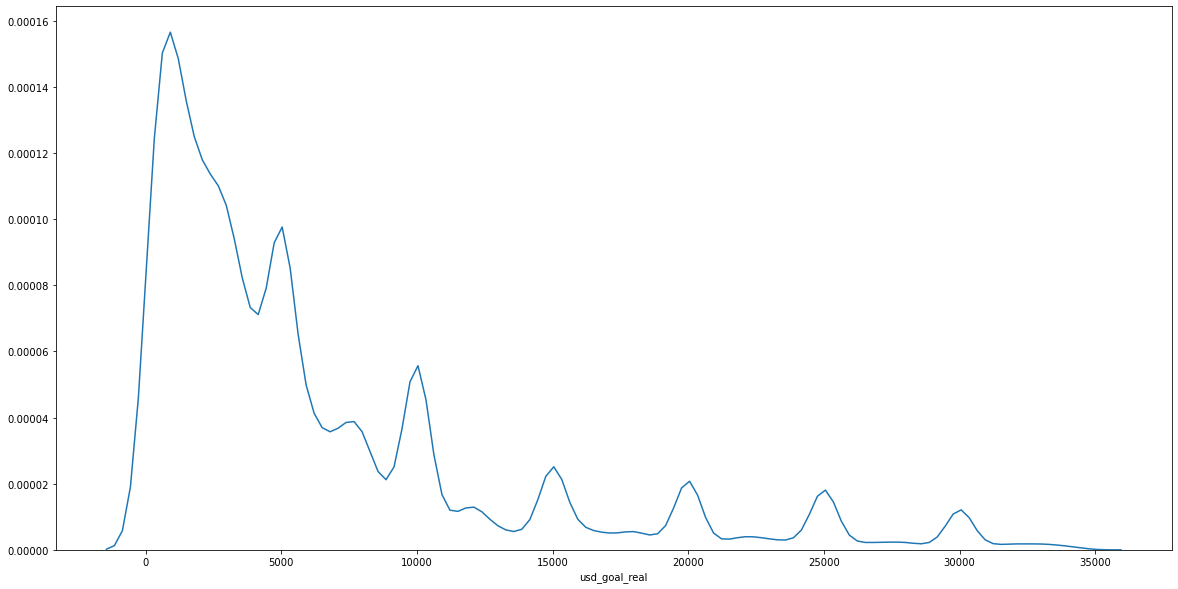

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(dfx['usd_goal_real'], hist=False)
plt.MaxNLocator()
plt.ticklabel_format(style='plain',axis='x')

Describing Data:

No.6 time avail


time avail is the time available for the campaigners to go 'live' and invite potential consumers to back their campaign..
ranging from 0 days to 16738 days or about 45 years
at first, i think that 0 days and 45 years are a mistake.. but according to the table below, some campaigns with 0 days time limit (less than a day) actually succeeded, while the one with long years are cancelled due to mistake and being suspended due to violation of the terms and conditions


In [19]:
df['time_avail'].value_counts().sort_index()

0          93
1         137
2         203
3         200
4         456
         ... 
88        378
89       1308
90        445
91         22
16738       1
Name: time_avail, Length: 93, dtype: int64

In [20]:
df[['state','time_avail']].sort_values(by=['time_avail'])

state  time_avail
ID                                
1103482181      failed           0
193993280   successful           0
867492213       failed           0
888830641       failed           0
905317930       failed           0
...                ...         ...
1780605198      failed          91
1195307917      failed          91
1310395136      failed          91
144788399   successful          91
69489148        failed       16738

[337079 rows x 2 columns]

Bivariate and Multivariate Discription:

since we're going to predict if a campaing will succeed or fail, we're going to use 'state' as our target variable

<b>1. state and (sub) category</b><br>

in this comparison i will only present the top 20 of the most popular subcategories in Kickstarter

Product Design subcat is has the most failure rate in over 10000 failiures, followed by Documentary, Music, Food, and video games..
despite product designs highest failure rate, product design and table top games has the most successful rate in kickstarter almost reaching 8000 successes, followed by Shorts, and music.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

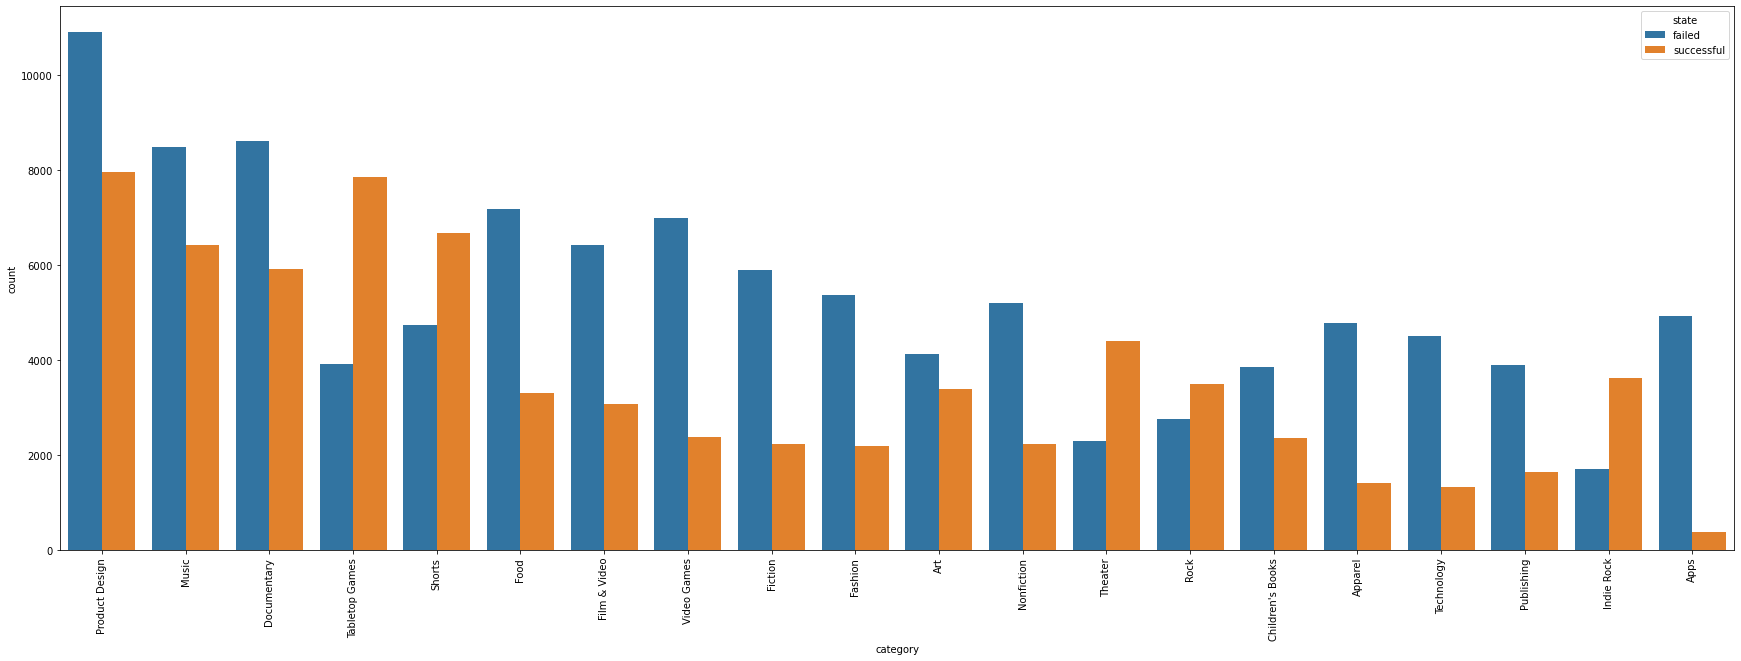

In [21]:
plt.figure(figsize=(30,10))
sns.countplot(x='category', data=df, order=df['category'].value_counts().iloc[:20].index, hue=df['state'])
plt.xticks(rotation=90)

<b>2. state and category</b><br>

in comparison with the state of the campaign and the category, there are four main categories with the success rate higher than the failiure rate which are Music, Theater, Comics, and Dance, despite Dance, Comics, and Theater aren't amongst the most popular main categories in Kickstarter..<br>
Films and Videos has the highest Failure rate despite it's the most popular main category in Kickstarter, followed by Music, and Publishings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

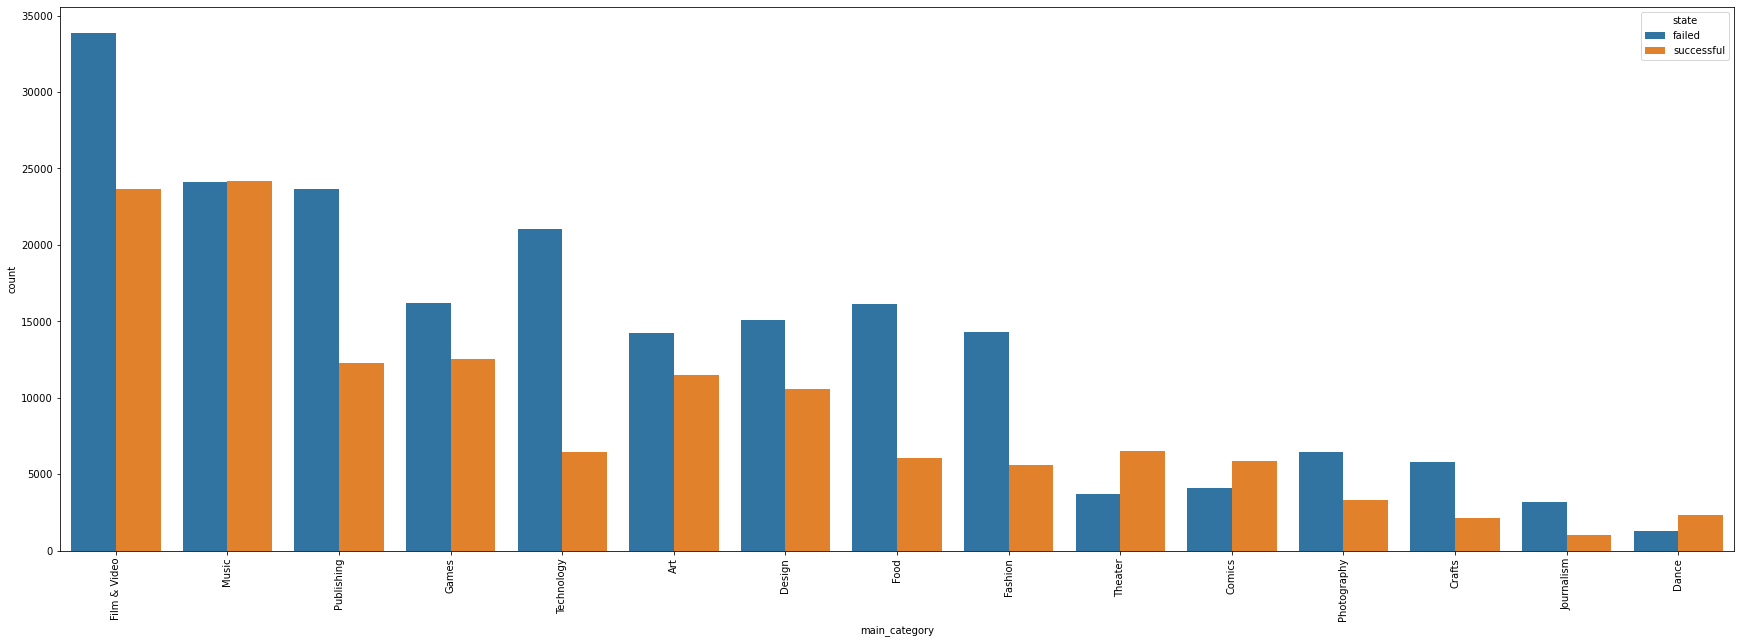

In [22]:
plt.figure(figsize=(30,10))
sns.countplot(x='main_category', data=df, order=df['main_category'].value_counts().index, hue=df['state'])
plt.xticks(rotation=90)

<b>3. state, number of pledges and number of goals</b><br>

before and after removing the outliers, it is shown that what determines the success and the failure of the campaign is to have the number of pledges exceeds the line above the goals, which means that the products should be popular and inviting enough to gather a lot of people to pledge their money into backing the campaign

we could also say that despite setting a low goal for the campaign, that doesn't mean it has an absolute chance of being successful..
there are also some low goals that didn't achieve..
on top of that, there are also some campaigns that wasn't successful despite having pledges passing their goal

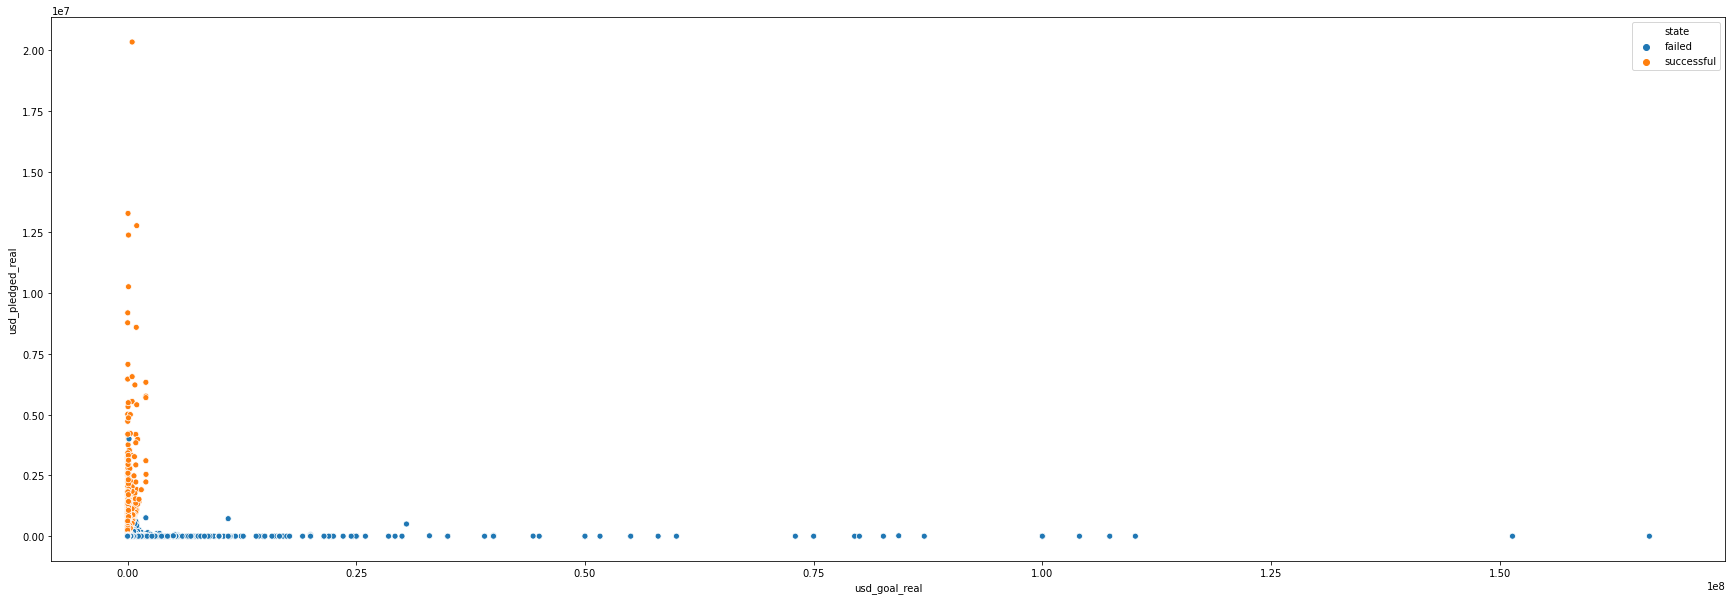

In [23]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=df['usd_goal_real'],y=df['usd_pledged_real'],hue=df['state'])

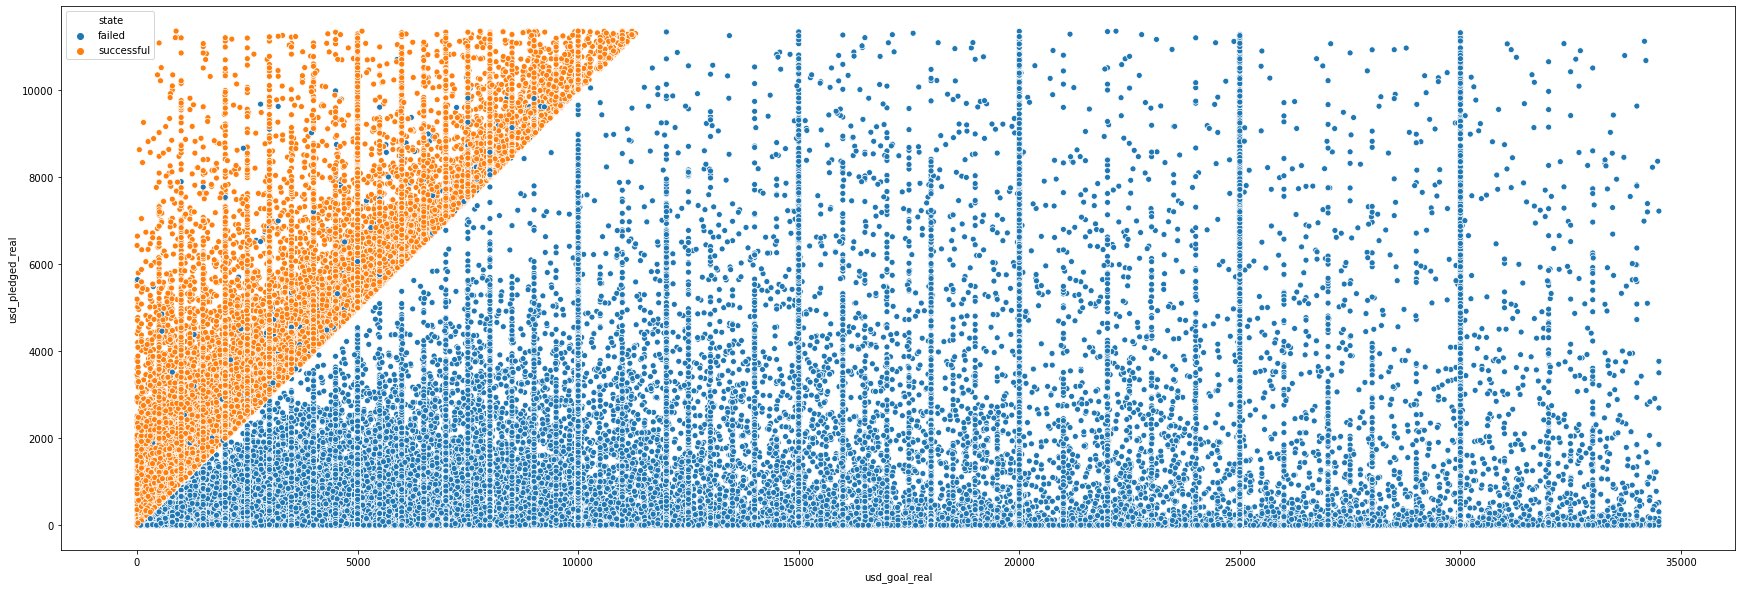

In [24]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=dfx['usd_goal_real'],y=dfx['usd_pledged_real'],hue=dfx['state'])

<b>4. state, number of pledges, number of goals, and number of backers</b><br>

on this description, i'll be using 2 set of visualization

a. state, number of pledges, and backers<br>
according to the first scatter plot, we can see that there are some failures happen on high number of backers with a high number of money pleged into the campaign.
on the other hand, there are also some campaigns that succeeded on low number of backers with low number of money pleged..
but as we see, the concentration of successes happened on the upper right where they have a high number of backers and high number of money pleged into the campaign, while the concentration of failures happen on the lower left with low number of backers and low number of usd pleged..

b. on the scatter plot below, we can see that the high concentration of successes happen on the high number of backers relative to the lower goals, while most failures happen on the low number of backers and high number of goals set by the campaigners.. while the scatter plot also shows that there are some campaigns with the goal set high with also a high number of backers but still didn't achieve successfully

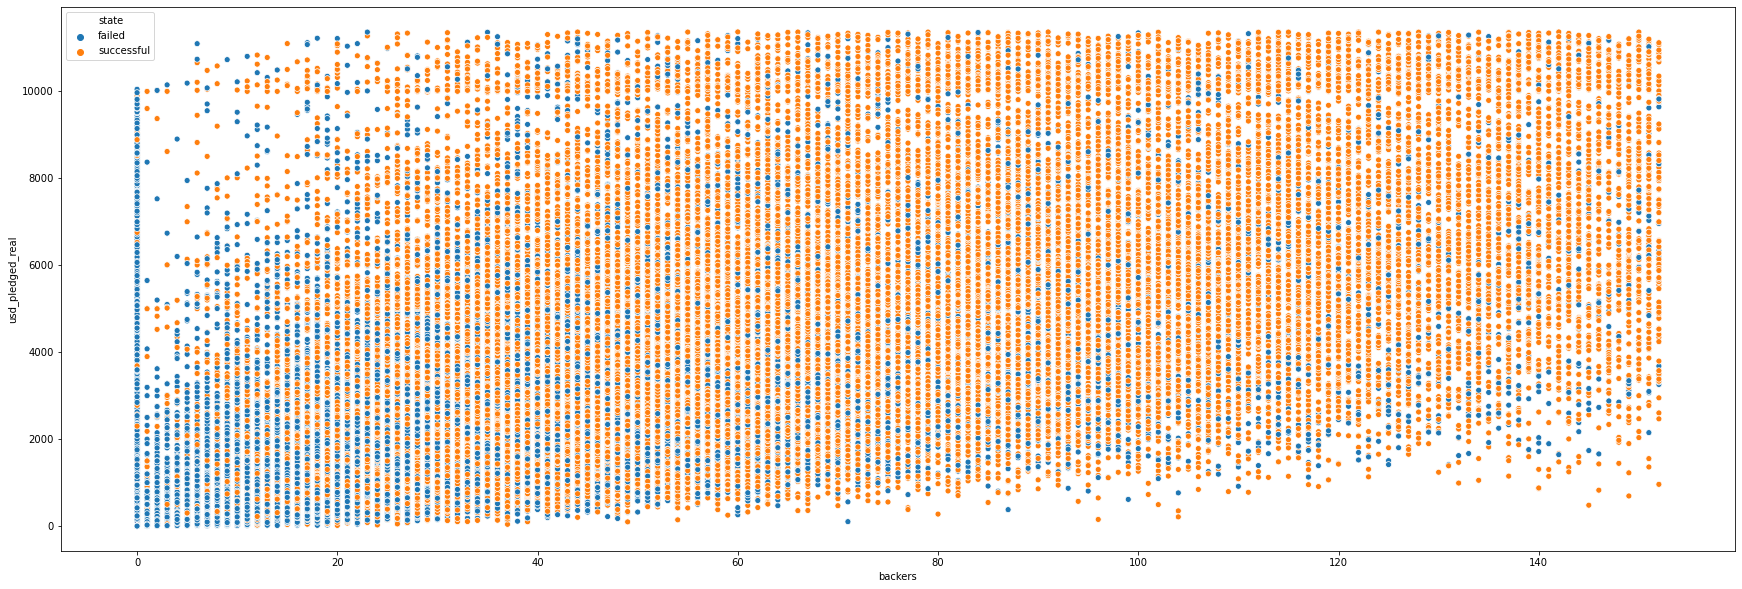

In [25]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=dfx['backers'],y=dfx['usd_pledged_real'],hue=dfx['state'])

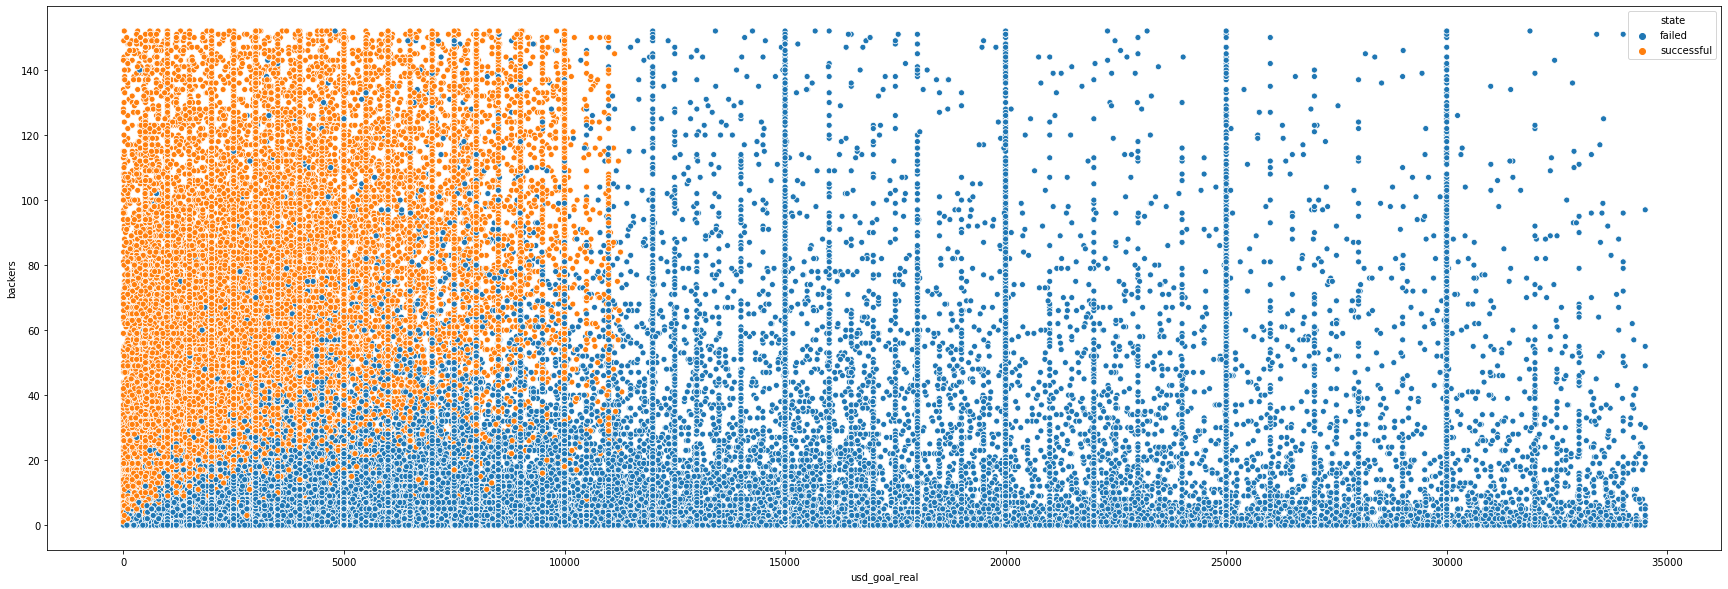

In [26]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=dfx['usd_goal_real'],y=dfx['backers'],hue=dfx['state'])

so, basically, those who are able to get pledges above the goal set, must be successful..
<br>
<br>
<br>
..... or is it?

there are 1873 campaigns that already reached it's goal, but ended up failing anyway

In [28]:
df1 = df[df.usd_goal_real < df.usd_pledged_real]
df2 = df1[df1.state == 'failed']
df2[['usd_pledged_real','usd_goal_real','state']]

usd_pledged_real  usd_goal_real   state
ID                                                 
100149523            3402.08        3211.53  failed
1001732009          39693.00       25000.00  failed
1003023003           3576.00        3500.00  failed
1003130892           7007.80        6000.00  failed
1003629045           3660.38        3000.00  failed
...                      ...            ...     ...
99613274             5324.59        4541.88  failed
997554968            8582.00        8000.00  failed
997915422            6065.26        5000.00  failed
998319149            2845.61        2752.04  failed
999610349            3273.36        3080.81  failed

[1873 rows x 3 columns]